# MOVIE GENURE CLASSIFICATION

#### ==========================================

#### WHAT IS A MOVIE GENURE   ?

A movie genre is a category that classifies films based on their thematic elements, narrative style, and tone.

Common genres include action, drama, comedy, horror, science fiction, and romance. Each genre has distinct

characteristics that define the type of story and emotions portrayed in the film.

#### WHAT ARE THE COMMON TYPE  OF MOVIE GENURE ?

# ==================================================

##### IMPORT PAKAGES

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
import nltk

from nltk import word_tokenize

import string

import re

In [3]:
#MODEl 

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

##### LOAD THE DATASET

In [4]:
df=pd.read_csv("F:/CODE SOFT/Genre Classification Dataset/train_data.txt",sep='\t',header=None,names=["TEXT"])

In [5]:
df

,TEXT
0,1 ::: Oscar et la dame rose (2009) ::: drama :...
1,2 ::: Cupid (1997) ::: thriller ::: A brother ...
2,"3 ::: Young, Wild and Wonderful (1980) ::: adu..."
3,4 ::: The Secret Sin (1915) ::: drama ::: To h...
4,5 ::: The Unrecovered (2007) ::: drama ::: The...
...,...
54209,"54210 ::: ""Bonino"" (1953) ::: comedy ::: This ..."
54210,54211 ::: Dead Girls Don't Cry (????) ::: horr...
54211,54212 ::: Ronald Goedemondt: Ze bestaan echt (...
54212,54213 ::: Make Your Own Bed (1944) ::: comedy ...


In [6]:
df[['No.','Title','Genre','Description']]=df['TEXT'].str.split(":::",expand=True)

In [7]:
df=df.drop(["TEXT","No."],axis=1)

In [8]:
df

,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [9]:
df.head()

,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [10]:
df.tail()

,Title,Genre,Description
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...
54213,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense ..."


In [11]:
df.sample(10)

,Title,Genre,Description
50498,Me Me Me (2011),musical,Jane Fellowes is a work experience girl on Br...
3878,Transworld Skate & Create (2010),documentary,"For the first time ever, a TransWorld TV show..."
26698,"Apollo 11, un pas en fals? (2010)",short,This mockumentary shows us what would have ha...
24212,The Intruders (2015/I),thriller,The disturbed twenty year-old Rose Halshford ...
20221,"Art on Film, Program 1: Balance (1992)",documentary,The Program for Art on Film was a joint ventu...
18579,La Pica sul Pacifico (1959),comedy,Adelaide riceve in ereditŕ dal marito Beniami...
5253,"Hello, Annapolis (1942)",comedy,Bill Arden and Paul Herbert sign up at the ti...
10514,Préméditation (1960),drama,Bernard Sommet has killed his wife and her lo...
9237,Atoll K (1951),comedy,"Heading for a newly inherited island, the boy..."
43103,"""Erwtje!"" (2001)",drama,Six episodes in which ERWTJE constantly seems...


In [12]:
df.shape

(54214, 3)

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [15]:
df.describe().T

,count,unique,top,freq
Title,54214,54214,Oscar et la dame rose (2009),1
Genre,54214,27,drama,13613
Description,54214,54086,Grammy - music award of the American academy ...,12


In [16]:
df.isna().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [17]:
df.dtypes

Title          object
Genre          object
Description    object
dtype: object

In [18]:
df["Genre"].value_counts()

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

In [19]:
Genre_count=df['Genre'].value_counts()

In [20]:
valid_Genre=Genre_count[Genre_count>=900].index
df=df[df['Genre'].isin(valid_Genre)]
df

,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
5,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
...,...,...,...
54207,Kaçamak (1988),drama,A man and woman meet during the identificatio...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."


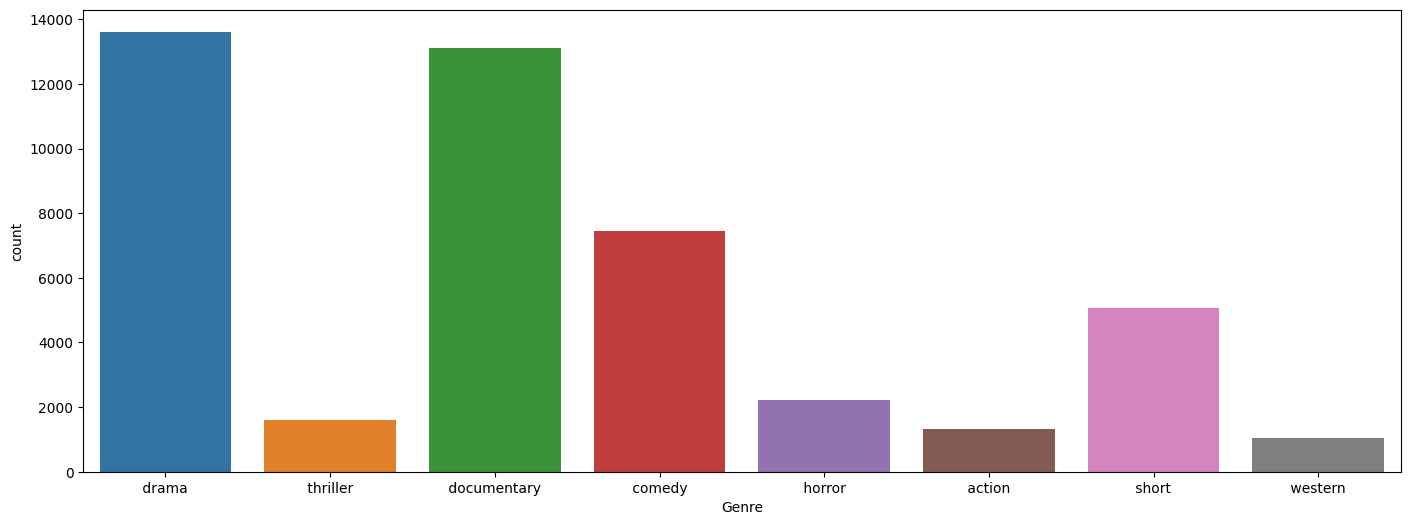

In [21]:
plt.figure(figsize=(17,6))

sns.countplot(df,x="Genre")

plt.show()

##### NLP - TECHNIQUES

In [22]:
Review=df['Description']
Review

0         Listening in to a conversation between his do...
1         A brother and sister with a past incestuous r...
3         To help their unemployed father make ends mee...
4         The film's title refers not only to the un-re...
5         Quality Control consists of a series of 16mm ...
                               ...                        
54207     A man and woman meet during the identificatio...
54209     This short-lived NBC live sitcom centered on ...
54210     The NEXT Generation of EXPLOITATION. The sist...
54211     Ze bestaan echt, is a stand-up comedy about g...
54212     Walter and Vivian live in the country and hav...
Name: Description, Length: 45371, dtype: object

In [23]:
tokens=[]

for i in Review:
    eachword=word_tokenize(i)
    tokens.extend(eachword)

tokens

['Listening',
 'in',
 'to',
 'a',
 'conversation',
 'between',
 'his',
 'doctor',
 'and',
 'parents',
 ',',
 '10-year-old',
 'Oscar',
 'learns',
 'what',
 'nobody',
 'has',
 'the',
 'courage',
 'to',
 'tell',
 'him',
 '.',
 'He',
 'only',
 'has',
 'a',
 'few',
 'weeks',
 'to',
 'live',
 '.',
 'Furious',
 ',',
 'he',
 'refuses',
 'to',
 'speak',
 'to',
 'anyone',
 'except',
 'straight-talking',
 'Rose',
 ',',
 'the',
 'lady',
 'in',
 'pink',
 'he',
 'meets',
 'on',
 'the',
 'hospital',
 'stairs',
 '.',
 'As',
 'Christmas',
 'approaches',
 ',',
 'Rose',
 'uses',
 'her',
 'fantastical',
 'experiences',
 'as',
 'a',
 'professional',
 'wrestler',
 ',',
 'her',
 'imagination',
 ',',
 'wit',
 'and',
 'charm',
 'to',
 'allow',
 'Oscar',
 'to',
 'live',
 'life',
 'and',
 'love',
 'to',
 'the',
 'full',
 ',',
 'in',
 'the',
 'company',
 'of',
 'his',
 'friends',
 'Pop',
 'Corn',
 ',',
 'Einstein',
 ',',
 'Bacon',
 'and',
 'childhood',
 'sweetheart',
 'Peggy',
 'Blue',
 '.',
 'A',
 'brother',
 'a

In [24]:
lower=[i.lower() for i in tokens]

lower

['listening',
 'in',
 'to',
 'a',
 'conversation',
 'between',
 'his',
 'doctor',
 'and',
 'parents',
 ',',
 '10-year-old',
 'oscar',
 'learns',
 'what',
 'nobody',
 'has',
 'the',
 'courage',
 'to',
 'tell',
 'him',
 '.',
 'he',
 'only',
 'has',
 'a',
 'few',
 'weeks',
 'to',
 'live',
 '.',
 'furious',
 ',',
 'he',
 'refuses',
 'to',
 'speak',
 'to',
 'anyone',
 'except',
 'straight-talking',
 'rose',
 ',',
 'the',
 'lady',
 'in',
 'pink',
 'he',
 'meets',
 'on',
 'the',
 'hospital',
 'stairs',
 '.',
 'as',
 'christmas',
 'approaches',
 ',',
 'rose',
 'uses',
 'her',
 'fantastical',
 'experiences',
 'as',
 'a',
 'professional',
 'wrestler',
 ',',
 'her',
 'imagination',
 ',',
 'wit',
 'and',
 'charm',
 'to',
 'allow',
 'oscar',
 'to',
 'live',
 'life',
 'and',
 'love',
 'to',
 'the',
 'full',
 ',',
 'in',
 'the',
 'company',
 'of',
 'his',
 'friends',
 'pop',
 'corn',
 ',',
 'einstein',
 ',',
 'bacon',
 'and',
 'childhood',
 'sweetheart',
 'peggy',
 'blue',
 '.',
 'a',
 'brother',
 'a

In [25]:
punct=string.punctuation

fill=[i for i in lower if i not in punct]

fill

['listening',
 'in',
 'to',
 'a',
 'conversation',
 'between',
 'his',
 'doctor',
 'and',
 'parents',
 '10-year-old',
 'oscar',
 'learns',
 'what',
 'nobody',
 'has',
 'the',
 'courage',
 'to',
 'tell',
 'him',
 'he',
 'only',
 'has',
 'a',
 'few',
 'weeks',
 'to',
 'live',
 'furious',
 'he',
 'refuses',
 'to',
 'speak',
 'to',
 'anyone',
 'except',
 'straight-talking',
 'rose',
 'the',
 'lady',
 'in',
 'pink',
 'he',
 'meets',
 'on',
 'the',
 'hospital',
 'stairs',
 'as',
 'christmas',
 'approaches',
 'rose',
 'uses',
 'her',
 'fantastical',
 'experiences',
 'as',
 'a',
 'professional',
 'wrestler',
 'her',
 'imagination',
 'wit',
 'and',
 'charm',
 'to',
 'allow',
 'oscar',
 'to',
 'live',
 'life',
 'and',
 'love',
 'to',
 'the',
 'full',
 'in',
 'the',
 'company',
 'of',
 'his',
 'friends',
 'pop',
 'corn',
 'einstein',
 'bacon',
 'and',
 'childhood',
 'sweetheart',
 'peggy',
 'blue',
 'a',
 'brother',
 'and',
 'sister',
 'with',
 'a',
 'past',
 'incestuous',
 'relationship',
 'have

In [26]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
remove = ['don', "don't", 'should', "aren'", "aren't", "couldn'", "couldn't",
          "didn'", "didn't", "doesn'", "doesn't", "hadn'", "hadn't", "hasn'",          
          "hasn't", "haven'", "haven't", "isn'", "isn't", "mightn'", "mightn't",
          "mustn'", "mustn't", "needn'", "needn't", "shan'", "shan't", "shouldn'",
          "shouldn't", "wasn'", "wasn't", "weren'", "weren't", "won'", "won't",
          "wouldn'", "wouldn't"]

In [28]:
stopwords=set(stopwords)-set(remove)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'd',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'more',
 'most',
 'mustn',
 'my',
 'myself',
 'needn',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 'she',
 "she's",
 "should've",
 'shouldn',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'the

In [29]:
filter=[i for i in fill if i not in stopwords]

filter

['listening',
 'conversation',
 'doctor',
 'parents',
 '10-year-old',
 'oscar',
 'learns',
 'nobody',
 'courage',
 'tell',
 'weeks',
 'live',
 'furious',
 'refuses',
 'speak',
 'anyone',
 'except',
 'straight-talking',
 'rose',
 'lady',
 'pink',
 'meets',
 'hospital',
 'stairs',
 'christmas',
 'approaches',
 'rose',
 'uses',
 'fantastical',
 'experiences',
 'professional',
 'wrestler',
 'imagination',
 'wit',
 'charm',
 'allow',
 'oscar',
 'live',
 'life',
 'love',
 'full',
 'company',
 'friends',
 'pop',
 'corn',
 'einstein',
 'bacon',
 'childhood',
 'sweetheart',
 'peggy',
 'blue',
 'brother',
 'sister',
 'past',
 'incestuous',
 'relationship',
 'current',
 'murderous',
 'relationship',
 'murders',
 'women',
 'reject',
 'murders',
 'women',
 'get',
 'close',
 'help',
 'unemployed',
 'father',
 'make',
 'ends',
 'meet',
 'edith',
 'twin',
 'sister',
 'grace',
 'work',
 'seamstresses',
 'invalid',
 'grace',
 'falls',
 'prey',
 'temptations',
 'chinatown',
 'opium',
 'becomes',
 'addict

In [30]:
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer

In [31]:
p_stemm=PorterStemmer()
s_stemm=SnowballStemmer(language='english')
lan_stemm=LancasterStemmer()

In [32]:
p_st=list(map(lambda x:p_stemm.stem(x),filter))
s_st=list(map(lambda x:s_stemm.stem(x),filter))
l_st=list(map(lambda x:lan_stemm.stem(x), filter))

In [33]:
pos=nltk.pos_tag(filter)
pos

[('listening', 'VBG'),
 ('conversation', 'NN'),
 ('doctor', 'NN'),
 ('parents', 'NNS'),
 ('10-year-old', 'JJ'),
 ('oscar', 'NN'),
 ('learns', 'VBZ'),
 ('nobody', 'JJ'),
 ('courage', 'NN'),
 ('tell', 'VB'),
 ('weeks', 'NNS'),
 ('live', 'VBP'),
 ('furious', 'JJ'),
 ('refuses', 'NNS'),
 ('speak', 'VBP'),
 ('anyone', 'NN'),
 ('except', 'IN'),
 ('straight-talking', 'NN'),
 ('rose', 'VBD'),
 ('lady', 'JJ'),
 ('pink', 'JJ'),
 ('meets', 'NNS'),
 ('hospital', 'JJ'),
 ('stairs', 'NNS'),
 ('christmas', 'NN'),
 ('approaches', 'NNS'),
 ('rose', 'VBD'),
 ('uses', 'NNS'),
 ('fantastical', 'JJ'),
 ('experiences', 'NNS'),
 ('professional', 'JJ'),
 ('wrestler', 'NN'),
 ('imagination', 'NN'),
 ('wit', 'NN'),
 ('charm', 'NN'),
 ('allow', 'NN'),
 ('oscar', 'NN'),
 ('live', 'JJ'),
 ('life', 'NN'),
 ('love', 'IN'),
 ('full', 'JJ'),
 ('company', 'NN'),
 ('friends', 'NNS'),
 ('pop', 'VBP'),
 ('corn', 'NN'),
 ('einstein', 'NN'),
 ('bacon', 'NN'),
 ('childhood', 'NN'),
 ('sweetheart', 'NN'),
 ('peggy', 'VBZ'),
 

In [34]:
vocab=set(filter)
vocab

{'hatboro',
 'jitli',
 '3:59',
 'away.so',
 'ass-blowing',
 'joelma',
 'legendarily',
 'joey-five',
 'work/karma',
 'beckermann',
 'sabaoon',
 'piershale',
 'unfolds.in',
 "'dad",
 'south-american',
 'gullets',
 'associates',
 'till',
 'spendabel',
 'lowery',
 'burocracy',
 'paiting',
 'silencing',
 'hezekiah',
 'back.he',
 'neuron',
 'ranchos',
 'mondragon',
 'roves',
 'pasión',
 'thebes',
 'skeates',
 'devos',
 'hardayal',
 'kono',
 'demarcated',
 'stringent',
 'bosphorous',
 'placer',
 'twenty-seven-year-old',
 'veranda',
 'relatedness',
 'commissioning',
 'biyuda',
 'erleben',
 'guests',
 'potato-crusted',
 'neil',
 'process',
 'vedantan',
 'danseurs-citoyens',
 'sont',
 'haraway',
 'valorise',
 'touchet',
 'one-night',
 'founds',
 'kinta',
 'korszerutlen',
 'non-indigenous',
 'odb',
 'attackers',
 'sells',
 'traitors',
 'event-filled',
 'cascading',
 'out-do',
 'rosey',
 'forsberg',
 'waffle',
 'jang-shin',
 'dissing',
 'éric',
 'substantiate',
 "nell'isola",
 'poncia',
 'oppugnan

In [35]:
bow={word:index for index,word in enumerate(filter)}
bow

{'listening': 2608224,
 'conversation': 2701454,
 'doctor': 2709415,
 'parents': 2709743,
 '10-year-old': 2636331,
 'oscar': 2605082,
 'learns': 2706289,
 'nobody': 2698483,
 'courage': 2695418,
 'tell': 2709817,
 'weeks': 2708923,
 'live': 2709798,
 'furious': 2668479,
 'refuses': 2707686,
 'speak': 2706137,
 'anyone': 2702846,
 'except': 2699292,
 'straight-talking': 2672591,
 'rose': 2706797,
 'lady': 2703828,
 'pink': 2685689,
 'meets': 2709536,
 'hospital': 2708988,
 'stairs': 2703579,
 'christmas': 2702134,
 'approaches': 2647095,
 'uses': 2706598,
 'fantastical': 2707008,
 'experiences': 2705768,
 'professional': 2706644,
 'wrestler': 2701103,
 'imagination': 2707343,
 'wit': 2675719,
 'charm': 2688845,
 'allow': 2698058,
 'life': 2709819,
 'love': 2709639,
 'full': 2708025,
 'company': 2708912,
 'friends': 2709298,
 'pop': 2705676,
 'corn': 2573547,
 'einstein': 2675837,
 'bacon': 2709400,
 'childhood': 2707478,
 'sweetheart': 2701715,
 'peggy': 2598457,
 'blue': 2705400,
 'bro

In [36]:
df

,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
5,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
...,...,...,...
54207,Kaçamak (1988),drama,A man and woman meet during the identificatio...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."


In [37]:
x=df['Description']
y=df['Genre']

In [38]:
x

0         Listening in to a conversation between his do...
1         A brother and sister with a past incestuous r...
3         To help their unemployed father make ends mee...
4         The film's title refers not only to the un-re...
5         Quality Control consists of a series of 16mm ...
                               ...                        
54207     A man and woman meet during the identificatio...
54209     This short-lived NBC live sitcom centered on ...
54210     The NEXT Generation of EXPLOITATION. The sist...
54211     Ze bestaan echt, is a stand-up comedy about g...
54212     Walter and Vivian live in the country and hav...
Name: Description, Length: 45371, dtype: object

In [39]:
y

0               drama 
1            thriller 
3               drama 
4               drama 
5         documentary 
             ...      
54207           drama 
54209          comedy 
54210          horror 
54211     documentary 
54212          comedy 
Name: Genre, Length: 45371, dtype: object

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [42]:
count_vectorizer=CountVectorizer()
tfidf_vectorizer=TfidfVectorizer()

x_train_count=count_vectorizer.fit_transform(x_train)
x_train_tfidf=tfidf_vectorizer.fit_transform(x_train)

x_test_count=count_vectorizer.fit_transform(x_test)
x_test_tfidf=tfidf_vectorizer.fit_transform(x_test)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform on the training data
x_train_count = count_vectorizer.fit_transform(x_train)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the test data
x_test_count = count_vectorizer.transform(x_test)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# MODEL 1: NAIVE-BAYES

In [65]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(x_train_tfidf, y_train)

MultinomialNB()

In [66]:
predictions = model.predict(x_test_tfidf)


from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("accuracy :",accuracy)
print(report)

accuracy : 0.5367493112947659
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       257
      comedy        0.71      0.03      0.06      1418
 documentary        0.68      0.89      0.77      2705
       drama        0.44      0.89      0.59      2713
      horror        0.00      0.00      0.00       417
       short        1.00      0.00      0.00      1026
    thriller        0.00      0.00      0.00       352
     western        0.00      0.00      0.00       187

     accuracy                           0.54      9075
    macro avg       0.35      0.23      0.18      9075
 weighted avg       0.56      0.54      0.42      9075



C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

# MODEL 2: LOGISTIC-REGRESSION

In [67]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train_tfidf, y_train)

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:

predictions = model.predict(x_test_tfidf)


from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("accuracy :",accuracy)
print(report)

accuracy : 0.6865013774104683
               precision    recall  f1-score   support

      action        0.74      0.23      0.35       257
      comedy        0.64      0.62      0.63      1418
 documentary        0.77      0.89      0.83      2705
       drama        0.63      0.80      0.70      2713
      horror        0.78      0.58      0.66       417
       short        0.59      0.28      0.38      1026
    thriller        0.52      0.09      0.16       352
     western        0.96      0.70      0.81       187

     accuracy                           0.69      9075
    macro avg       0.70      0.53      0.57      9075
 weighted avg       0.68      0.69      0.66      9075



# MODEL 3 : SUPPORT-VECTOR-CLASSIFIER

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='rbf',C=1,gamma='auto',decision_function_shape='ovr')

model.fit(x_train_tfidf, y_train)

In [ ]:

predictions = model.predict(x_test_tfidf)


from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("accuracy",accuracy)
print(report)